## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import calendar

sys.path.append('../')
from backend.constants import *
import backend.querying.query_path_constants as query_constants

from api import * # see api.py

# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [3]:
# Map month number to month name
averaged_data_monthly = dataframe_from_url_ext(f'/data/sentiment_weather/{query_constants.AVG_MONTHLY_ANALYSIS}')
averaged_data_monthly['Month'] = pd.to_datetime(averaged_data_monthly['Month'], format='%m').dt.strftime('%B')
averaged_data_monthly

Fetching from http://localhost:9090/data/sentiment_weather/avg_monthly_analysis
{'columns': ['Month', 'Avg Rainfall', 'Avg Max Temp', 'Avg Sentiment (Scaled)'], 'rows': [['1', 102.67197261260296, 28.614161166511934, 163.1998152406754], ['2', 94.82707342814973, 28.104481641129773, 165.36963448660714], ['3', 82.84948916683328, 26.611396359017185, 155.13794969128026], ['4', 56.5583094838193, 23.94790344381136, 172.09459114583333], ['5', 56.675299177857674, 20.878706422826006, 175.37890908518145], ['6', 56.73887058753698, 18.3130515736382, 117.9028085049716], ['7', 54.288334848602105, 18.016106833437036, 128.6653218867861], ['8', 54.868929043122186, 19.076713716796334, 142.2264087701613], ['9', 50.366352098584166, 21.33588259488016, 137.5216169084774], ['10', 60.87893433274159, 23.500073505487716, 144.12610058593748], ['11', 67.09532482961487, 25.44234708658119, 136.11482975260415], ['12', 83.78735350953194, 27.254600384978424, 157.3362191280242]]}


,Month,Avg Rainfall,Avg Max Temp,Avg Sentiment (Scaled)
0,January,102.671973,28.614161,163.199815
1,February,94.827073,28.104482,165.369634
2,March,82.849489,26.611396,155.137950
3,April,56.558309,23.947903,172.094591
4,May,56.675299,20.878706,175.378909
5,June,56.738871,18.313052,117.902809
6,July,54.288335,18.016107,128.665322
7,August,54.868929,19.076714,142.226409
8,September,50.366352,21.335883,137.521617
9,October,60.878934,23.500074,144.126101


## Sentiment Analysis


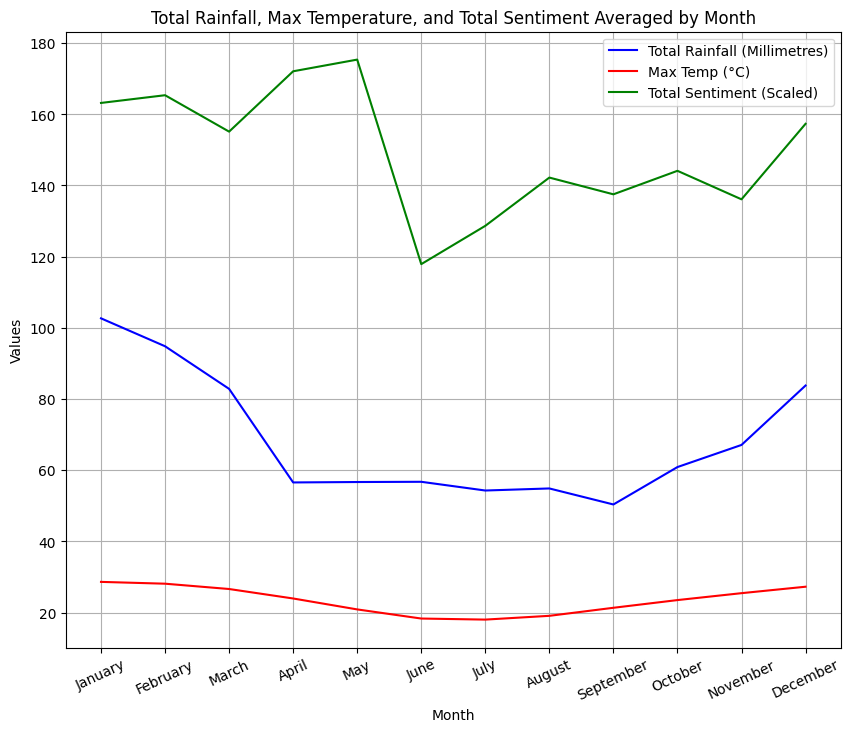

In [4]:
# Line plot
plt.figure(figsize=(10, 8))
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Rainfall'], color='blue', label='Total Rainfall (Millimetres)')
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Max Temp'], color='red', label='Max Temp (°C)')
plt.plot(averaged_data_monthly['Month'], averaged_data_monthly['Avg Sentiment (Scaled)'], color='green', label='Total Sentiment (Scaled)')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Total Rainfall, Max Temperature, and Total Sentiment Averaged by Month')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=25)
plt.show()

In [5]:
correlation_rainfall = averaged_data_monthly['Avg Sentiment (Scaled)'].corr(averaged_data_monthly['Avg Rainfall'])
correlation_temp = averaged_data_monthly['Avg Sentiment (Scaled)'].corr(averaged_data_monthly['Avg Max Temp'])
correlation_temp_rain = averaged_data_monthly['Avg Rainfall'].corr(averaged_data_monthly['Avg Max Temp'])

print("Correlation between Total Rainfall and Mean Max Temp:", correlation_temp_rain)
print("Correlation between Total Sentiment and Total Rainfall:", correlation_rainfall)
print("Correlation between Total Sentiment and Mean Max Temp:", correlation_temp)


Correlation between Total Rainfall and Mean Max Temp: 0.87290927755709
Correlation between Total Sentiment and Total Rainfall: 0.44120707760143546
Correlation between Total Sentiment and Mean Max Temp: 0.581758660369528


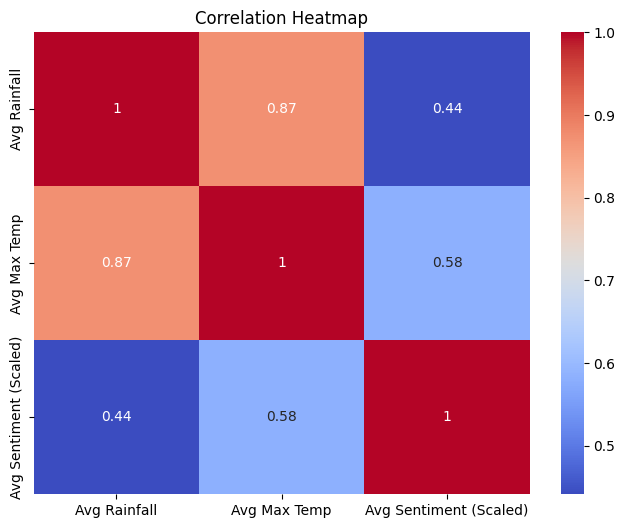

In [6]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(averaged_data_monthly.drop(columns='Month').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


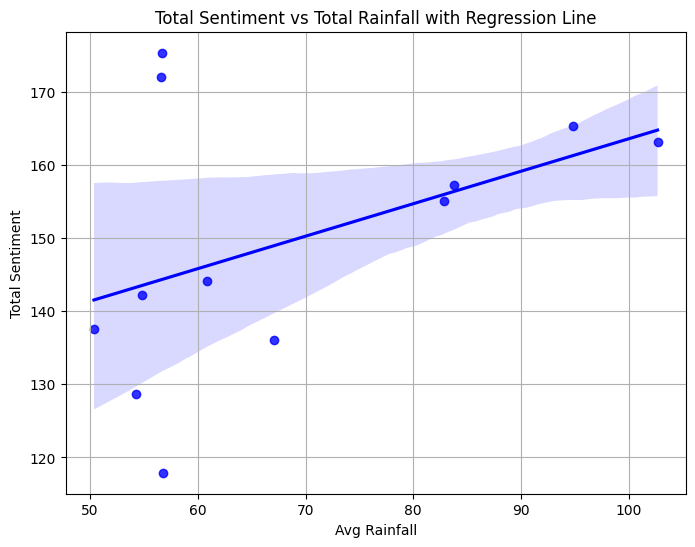

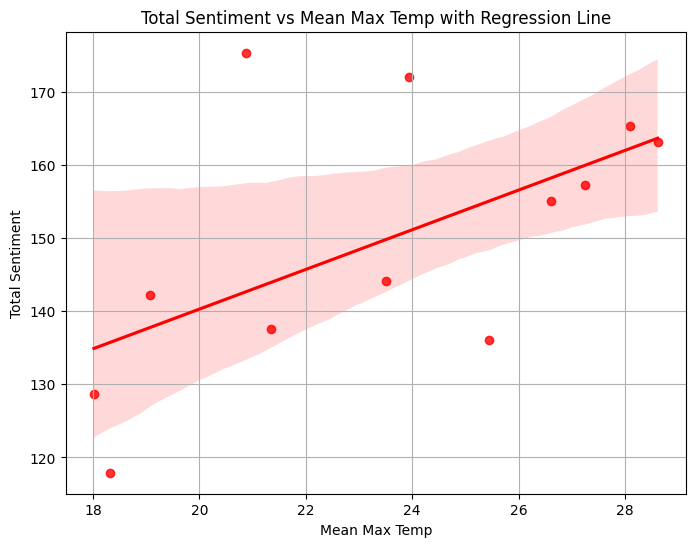

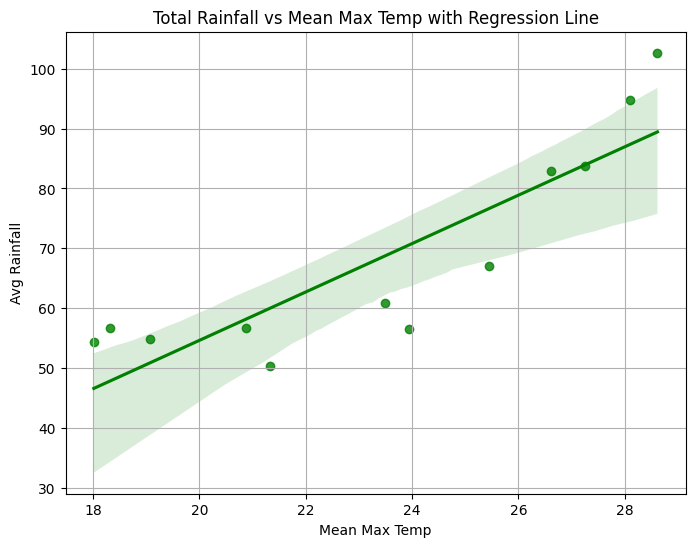

In [7]:
import seaborn as sns

# Scatter plot with regression line for Total Sentiment vs Mean Rainfall
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Rainfall', y='Avg Sentiment (Scaled)', data=averaged_data_monthly, color='blue')
plt.xlabel('Avg Rainfall')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Total Rainfall with Regression Line')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Max Temp', y='Avg Sentiment (Scaled)', data=averaged_data_monthly, color='red')
plt.xlabel('Mean Max Temp')
plt.ylabel('Total Sentiment')
plt.title('Total Sentiment vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()


# Scatter plot with regression line for Total Sentiment vs Mean Max Temp
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Max Temp', y='Avg Rainfall', data=averaged_data_monthly, color='green')
plt.xlabel('Mean Max Temp')
plt.ylabel('Avg Rainfall')
plt.title('Total Rainfall vs Mean Max Temp with Regression Line')
plt.grid(True)
plt.show()
